In [1]:
# Keras
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

2022-04-13 09:57:58.509659: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-13 09:57:58.509691: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,23,23]

194

In [5]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

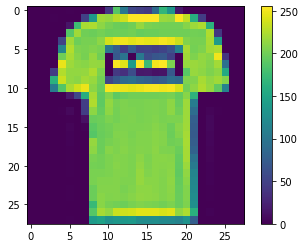

In [9]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
# Data preprocessing
train_images = train_images / 255.0

test_images = test_images / 255.0

In [14]:
# Creating the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

2022-04-13 10:01:42.505381: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-13 10:01:42.506753: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-13 10:01:42.507043: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-04-13 10:01:42.507144: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-04-13 10:01:42.507363: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [18]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Training
model.fit(train_images, train_labels, epochs=10)

2022-04-13 10:03:56.948200: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0843 - accuracy: 0.6625
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6399 - accuracy: 0.7697
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5673 - accuracy: 0.7971
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5256 - accuracy: 0.8141
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4984 - accuracy: 0.8245
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4772 - accuracy: 0.8331
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4621 - accuracy: 0.8381
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4498 - accuracy: 0.8420
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4392 - accuracy: 0.8460
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.431

In [17]:
# Evaluation
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.4616 - accuracy: 0.8341
Test accuracy: 0.8341000080108643


In [19]:
# Predictions
predictions = model.predict(test_images)

In [20]:
predictions[0]

array([6.4341953e-07, 4.5884402e-08, 5.1536554e-06, 4.4773560e-06,
       9.9657473e-06, 1.7512085e-01, 9.7672064e-06, 3.2753652e-01,
       4.2124358e-03, 4.9310023e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

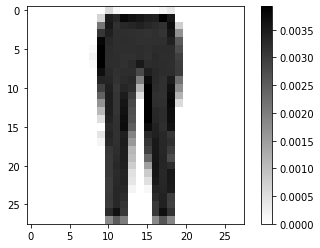

Actual: Trouser
Prediction: Trouser


In [27]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.colorbar()
  plt.grid(False)
  plt.show()
  print("Actual: " + label)
  print("Prediction: " + guess)


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)